In [370]:
%run functions.py
% run archive/silhouette_plotter.py

In [329]:
table = 'eth-tokens.test.clean_avg_with_balances_tokens'
label_table = 'eth-tokens.alldata.etherscan_labelcloud'

In [330]:
df, dflabel = load_data_from_bigquery(table, label_table)

In [331]:
pipe, results = data_pipeline(df)

In [332]:
cl = cluster(results, n_clusters=8)

In [333]:
assign_cluster_to_data(df, dflabel, cl)

In [334]:
tsne_results = calc_tsne(results, perplexity=50,n_iter=2000)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 35917 samples in 0.035s...
[t-SNE] Computed neighbors for 35917 samples in 16.473s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35917
[t-SNE] Computed conditional probabilities for sample 2000 / 35917
[t-SNE] Computed conditional probabilities for sample 3000 / 35917
[t-SNE] Computed conditional probabilities for sample 4000 / 35917
[t-SNE] Computed conditional probabilities for sample 5000 / 35917
[t-SNE] Computed conditional probabilities for sample 6000 / 35917
[t-SNE] Computed conditional probabilities for sample 7000 / 35917
[t-SNE] Computed conditional probabilities for sample 8000 / 35917
[t-SNE] Computed conditional probabilities for sample 9000 / 35917
[t-SNE] Computed conditional probabilities for sample 10000 / 35917
[t-SNE] Computed conditional probabilities for sample 11000 / 35917
[t-SNE] Computed conditional probabilities for sample 12000 / 35917
[t-SNE] Computed conditional probabilities for s

For n_clusters = 2 The average silhouette_score is : 0.2862275652820668
For n_clusters = 3 The average silhouette_score is : 0.2410878140269812
For n_clusters = 4 The average silhouette_score is : 0.22015795111524314
For n_clusters = 5 The average silhouette_score is : 0.17794388860325083
For n_clusters = 6 The average silhouette_score is : 0.18287463873059415
For n_clusters = 7 The average silhouette_score is : 0.18556707408142564
For n_clusters = 8 The average silhouette_score is : 0.18496895940889946
For n_clusters = 9 The average silhouette_score is : 0.15517393240438584
For n_clusters = 10 The average silhouette_score is : 0.16400980826625947


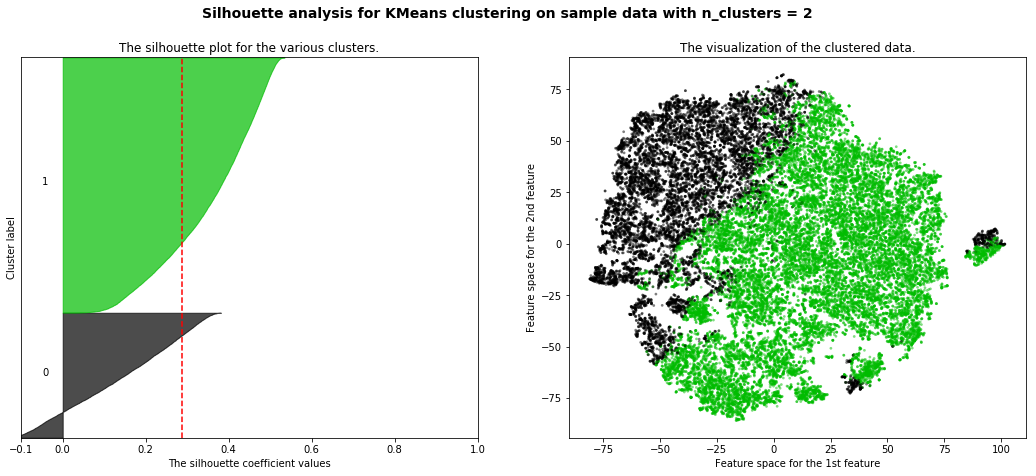

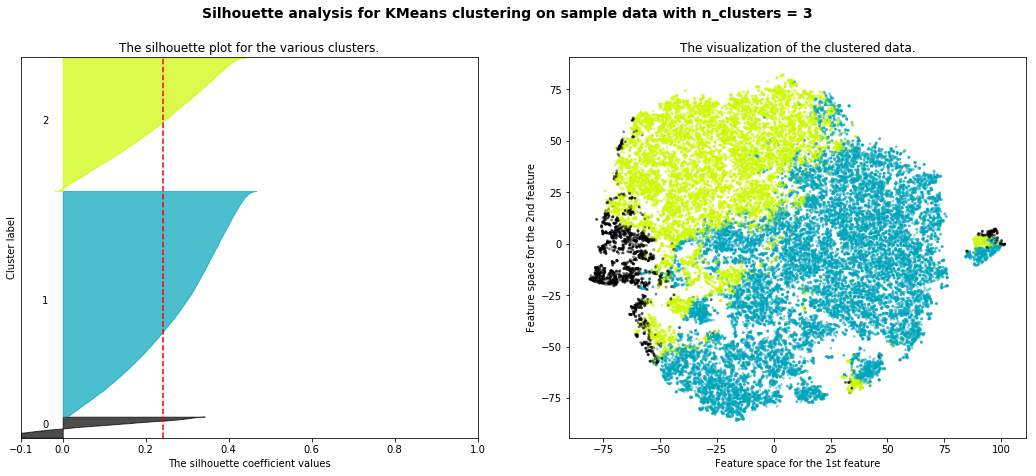

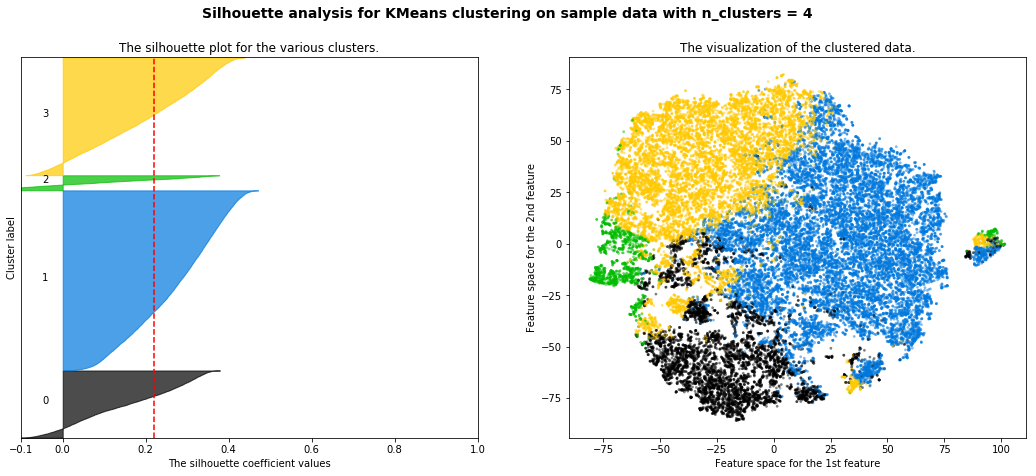

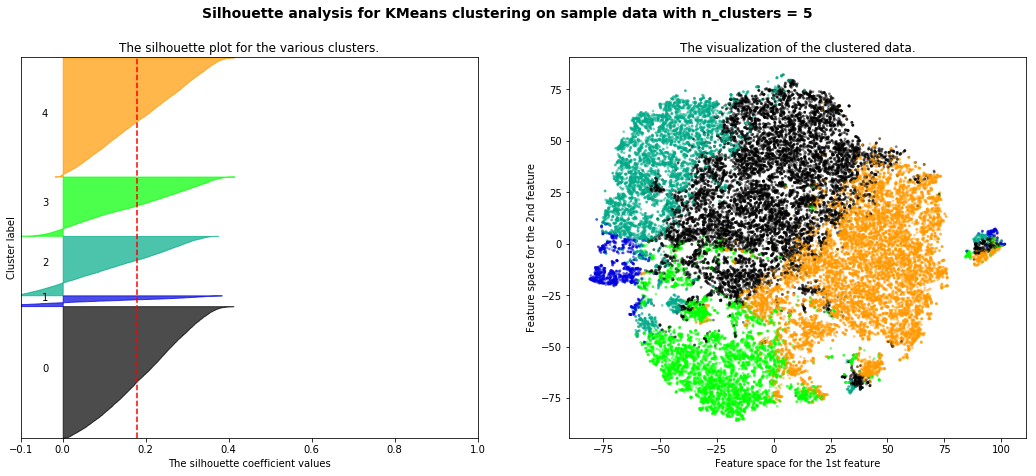

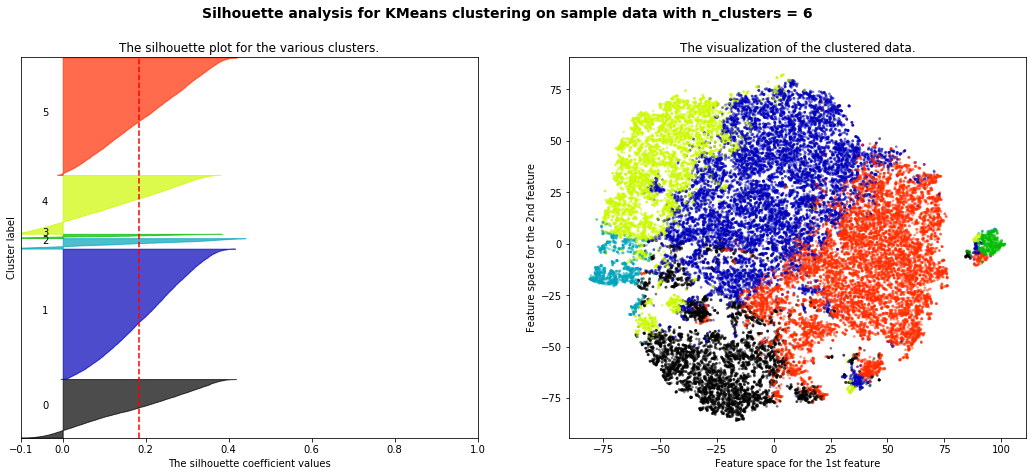

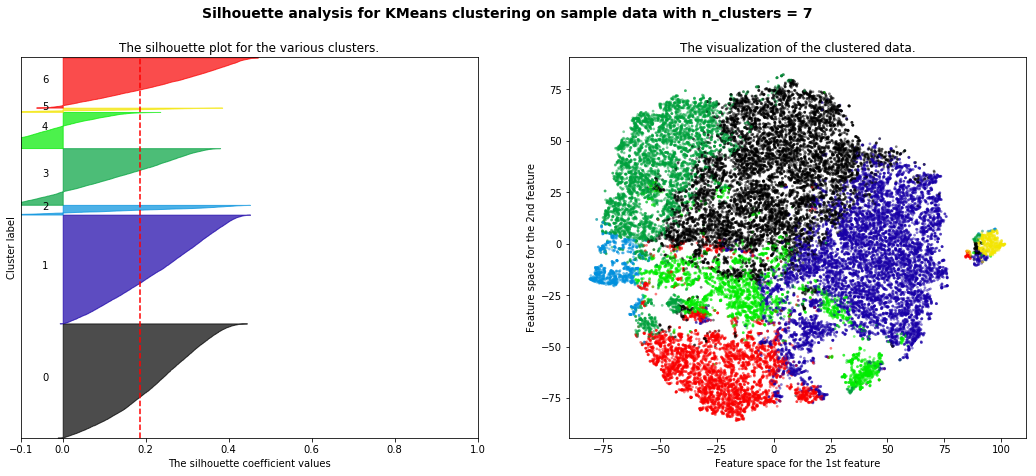

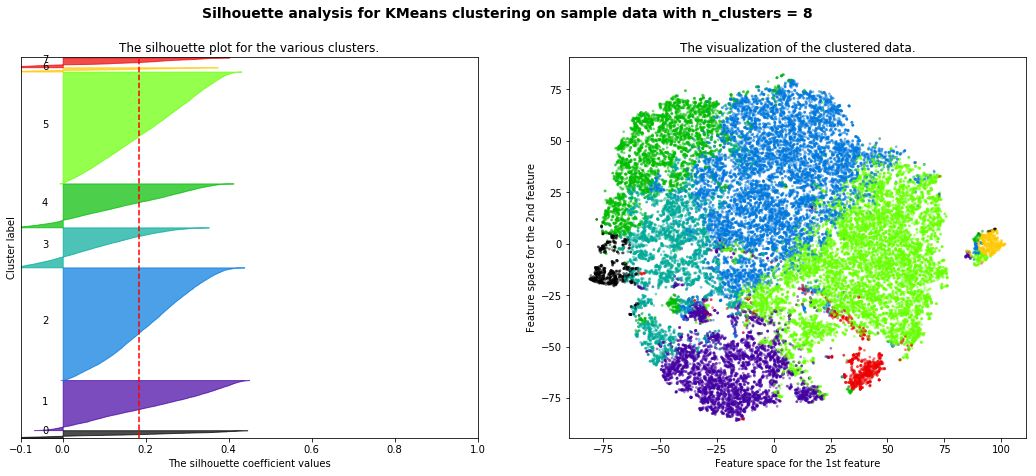

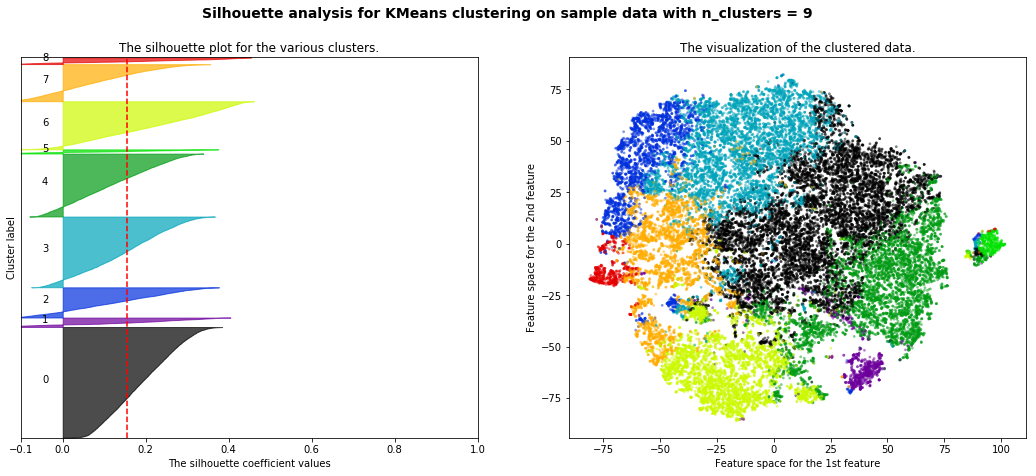

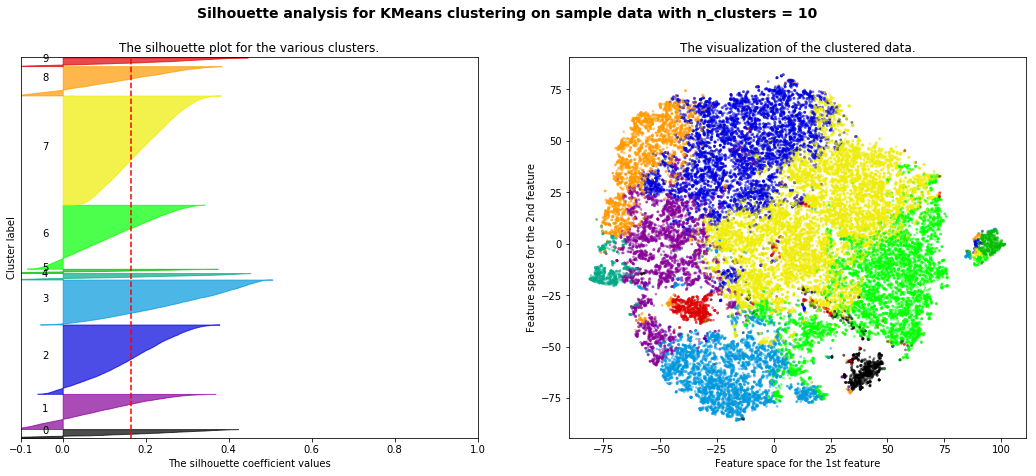

In [335]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]
sils = silhouette_plotter(results, range_n_clusters, tsne_results)

/home/ubuntu/ethereum_clustering/functions.py:98: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


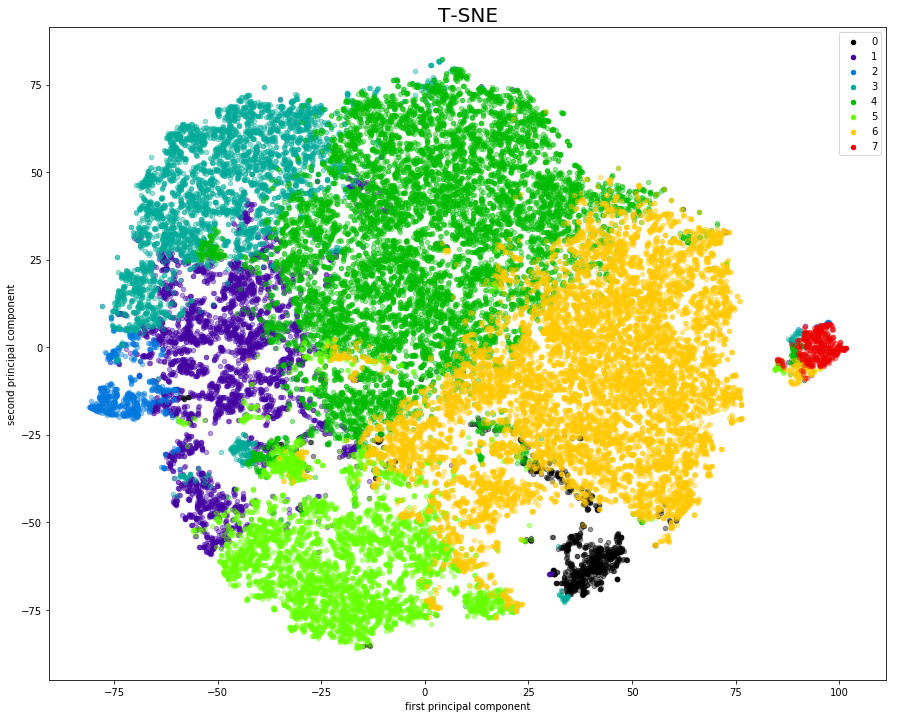

In [336]:
plot_tsne(cl, tsne_results)

In [337]:
#highlighting clusters of interest
categs = ('Exchange', 'Mining', 'ICO Wallets')
colors = ('green', 'blue', 'orange')

d = {}
for c in categs:
    d[c] = find_category_of_cluster(cl,dflabel, category=c)

clusters= list(d.values())

Exchange
cluster number   0   number of type found: 0    cluster size: 940   label density: 0.0
cluster number   1   number of type found: 1    cluster size: 3532   label density: 0.00028312570781426955
cluster number   2   number of type found: 45    cluster size: 640   label density: 0.0703125
cluster number   3   number of type found: 2    cluster size: 4094   label density: 0.0004885197850512946
cluster number   4   number of type found: 0    cluster size: 10924   label density: 0.0
cluster number   5   number of type found: 0    cluster size: 4812   label density: 0.0
cluster number   6   number of type found: 0    cluster size: 10577   label density: 0.0
cluster number   7   number of type found: 5    cluster size: 398   label density: 0.01256281407035176
Mining
cluster number   0   number of type found: 0    cluster size: 940   label density: 0.0
cluster number   1   number of type found: 1    cluster size: 3532   label density: 0.00028312570781426955
cluster number   2   number

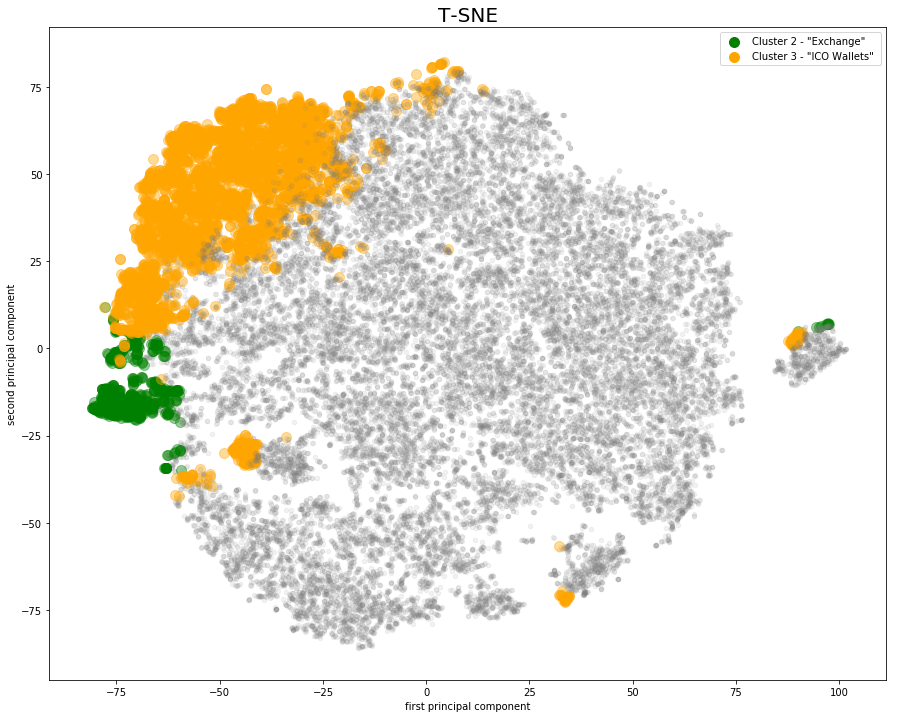

In [338]:
plot_tsne_with_labeled_clusters(tsne_results, cl, clusters, categs, colors)

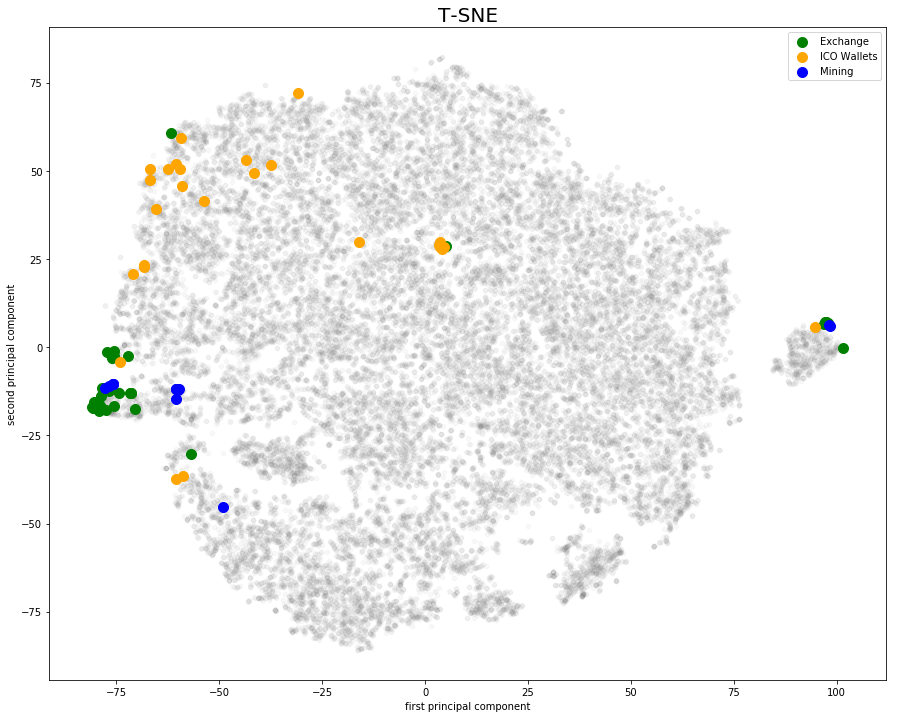

In [339]:
plot_tsne_with_labels(tsne_results,df, dflabel,categs,colors)

In [340]:
#highlighting clusters of interest
categs = ('Exchange', 'Mining')#, 'ICO Wallets')
colors = ('green', 'blue')#, 'orange')

d = {}
for c in categs:
    d[c] = find_category_of_cluster(cl,dflabel, category=c)

clusters= list(d.values())

Exchange
cluster number   0   number of type found: 0    cluster size: 940   label density: 0.0
cluster number   1   number of type found: 1    cluster size: 3532   label density: 0.00028312570781426955
cluster number   2   number of type found: 45    cluster size: 640   label density: 0.0703125
cluster number   3   number of type found: 2    cluster size: 4094   label density: 0.0004885197850512946
cluster number   4   number of type found: 0    cluster size: 10924   label density: 0.0
cluster number   5   number of type found: 0    cluster size: 4812   label density: 0.0
cluster number   6   number of type found: 0    cluster size: 10577   label density: 0.0
cluster number   7   number of type found: 5    cluster size: 398   label density: 0.01256281407035176
Mining
cluster number   0   number of type found: 0    cluster size: 940   label density: 0.0
cluster number   1   number of type found: 1    cluster size: 3532   label density: 0.00028312570781426955
cluster number   2   number

In [341]:
#recluster with only clusters of interest - will help with separation

subpipe, subcl, subresults, newdf = recluster(df, cl, clusters, n_clusters=3)

In [342]:
sub_tsne_results = calc_tsne(subresults)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 640 samples in 0.000s...
[t-SNE] Computed neighbors for 640 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 640 / 640
[t-SNE] Mean sigma: 1.486027
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.144211
[t-SNE] KL divergence after 300 iterations: 0.788891
t-SNE done! Time elapsed: 1.1083965301513672 seconds


For n_clusters = 3 The average silhouette_score is : 0.23503450553850752


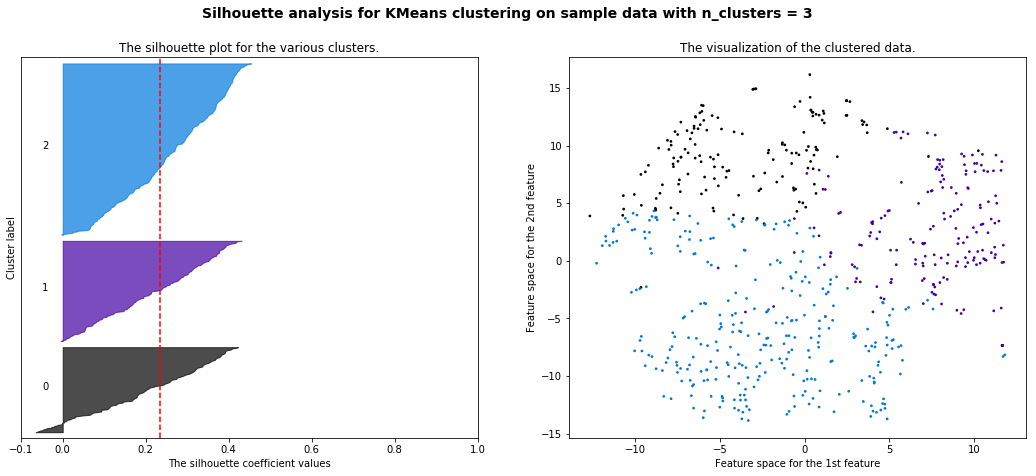

In [371]:
range_n_clusters = [3]
sub_sils = silhouette_plotter(subresults, range_n_clusters, sub_tsne_results)

In [344]:
assign_cluster_to_data(newdf, dflabel, subcl)

In [345]:
#highlighting clusters of interest

d = {}
for c in categs:
    d[c] = find_category_of_cluster(subcl,dflabel, category=c)

subclusters= list(d.values())

Exchange
cluster number   0   number of type found: 33    cluster size: 153   label density: 0.21568627450980393
cluster number   1   number of type found: 4    cluster size: 307   label density: 0.013029315960912053
cluster number   2   number of type found: 8    cluster size: 180   label density: 0.044444444444444446
Mining
cluster number   0   number of type found: 2    cluster size: 153   label density: 0.013071895424836602
cluster number   1   number of type found: 9    cluster size: 307   label density: 0.029315960912052116
cluster number   2   number of type found: 0    cluster size: 180   label density: 0.0


/home/ubuntu/ethereum_clustering/functions.py:98: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


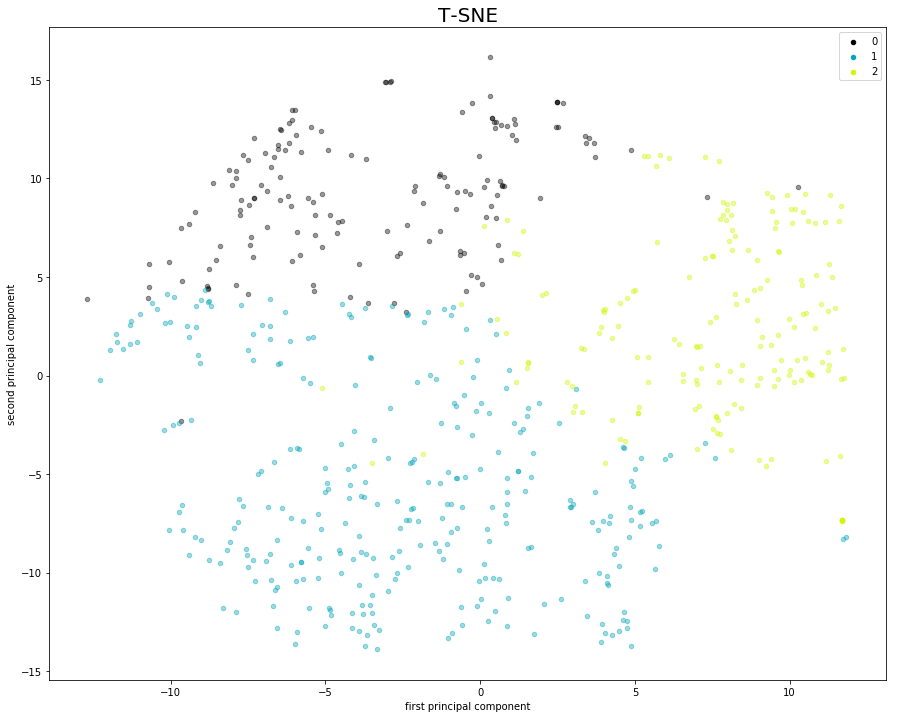

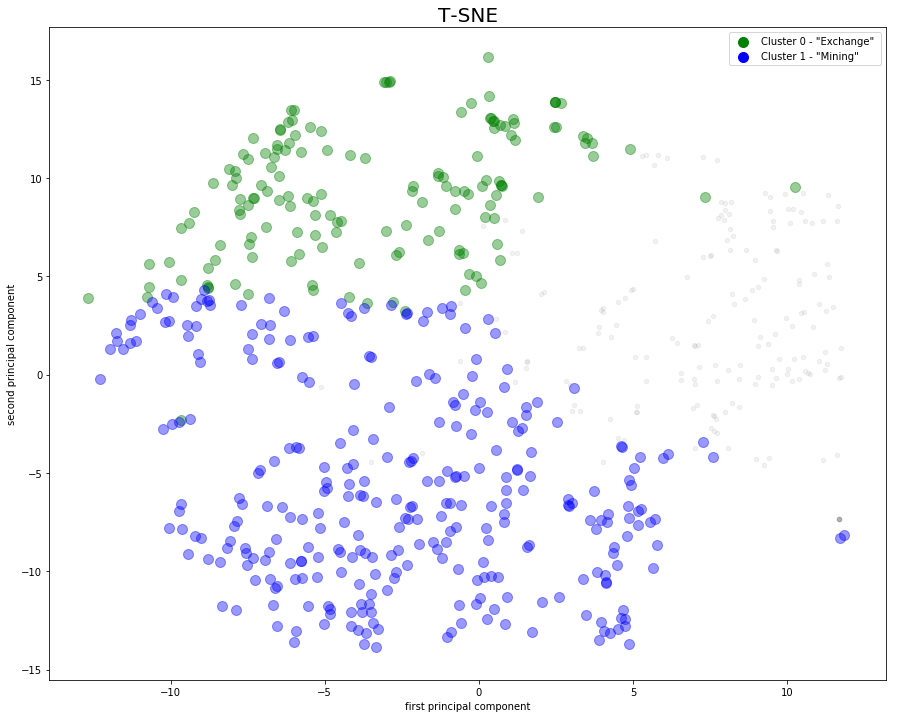

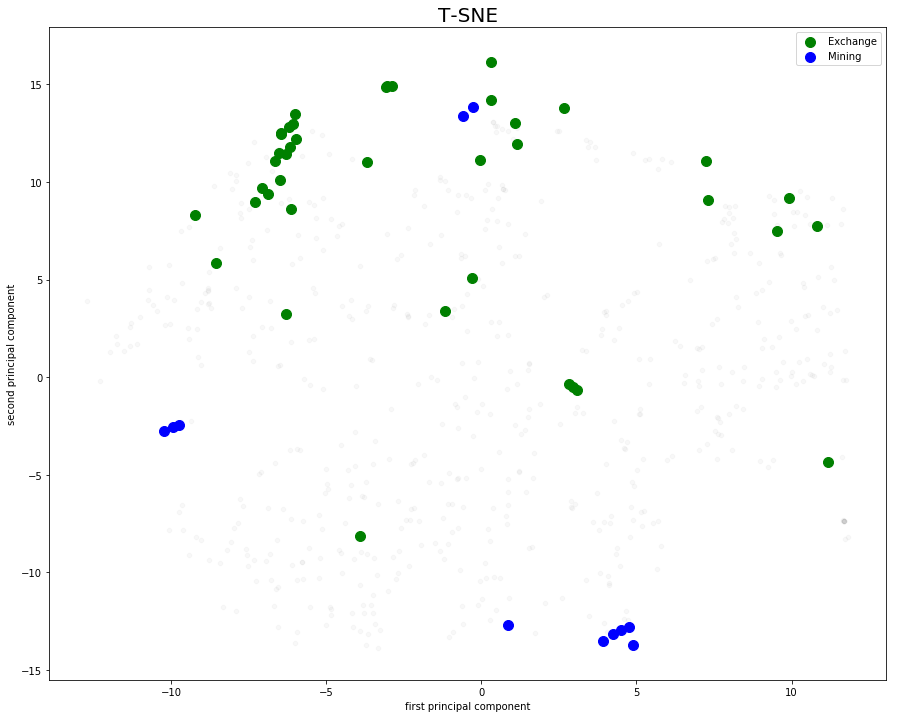

In [346]:
plot_all(sub_tsne_results,subcl,newdf,dflabel,subclusters,categs,colors )


In [347]:
mask = (cl.labels_==999)
for c in clusters:
    mask |= (cl.labels_==c)
np.sum(mask)

640

In [348]:
import copy

In [349]:
lbls = copy.deepcopy(cl.labels_)

In [350]:
lbls[mask] =  [100+subcl.labels_[i] for i in range(len(subcl.labels_))]

In [351]:
lbls

array([  5,   1,   3, ...,   1,   1, 101], dtype=int32)

In [352]:
clnew = copy.deepcopy(cl)

In [353]:
clnew.labels_=lbls

In [354]:
mask = np.array([c not in clusters for c in np.unique(cl.labels_) ])
clnew.cluster_centers_ = clnew.cluster_centers_[mask]

In [355]:
clnew.n_clusters=cl.n_clusters - len(np.unique(clusters)) + subcl.n_clusters

In [356]:
clnew.cluster_centers_ = np.vstack((clnew.cluster_centers_, subcl.cluster_centers_))

In [357]:
assign_cluster_to_data(df, dflabel, clnew)

In [358]:
#highlighting clusters of interest
categs = ('Exchange', 'Mining', 'ICO Wallets')
colors = ('green', 'blue', 'orange')

d = {}
for c in categs:
    d[c] = find_category_of_cluster(clnew,dflabel, category=c)

clusters= list(d.values())

Exchange
cluster number   0   number of type found: 0    cluster size: 940   label density: 0.0
cluster number   1   number of type found: 1    cluster size: 3532   label density: 0.00028312570781426955
cluster number   3   number of type found: 2    cluster size: 4094   label density: 0.0004885197850512946
cluster number   4   number of type found: 0    cluster size: 10924   label density: 0.0
cluster number   5   number of type found: 0    cluster size: 4812   label density: 0.0
cluster number   6   number of type found: 0    cluster size: 10577   label density: 0.0
cluster number   7   number of type found: 5    cluster size: 398   label density: 0.01256281407035176
cluster number   100   number of type found: 33    cluster size: 153   label density: 0.21568627450980393
cluster number   101   number of type found: 4    cluster size: 307   label density: 0.013029315960912053
cluster number   102   number of type found: 8    cluster size: 180   label density: 0.044444444444444446
Mini

In [359]:
for clust in np.unique(clnew.labels_):
    print('cluster {}'.format(clust))
    print('labelled points: {}'.format(np.sum([dflabel['cluster']==clust])))
    print('total points: {}'.format(np.sum(cl.labels_==clust)))
    print(dflabel[dflabel['cluster']==clust][['label','category']])
    print('\n\n\n')

cluster 0
labelled points: 1
total points: 940
    label category
9  IDEX_2      Dex




cluster 1
labelled points: 5
total points: 3532
                   label     category
4               Bitmax_2     Exchange
29  MyEtherWallet_Donate       Donate
36            KuveraPool       Mining
67     LinkerCoin_Wallet  ICO Wallets
96        Humaniq_Wallet  ICO Wallets




cluster 3
labelled points: 28
total points: 4094
                          label               category
2                 Rate3_Wallet2            ICO Wallets
6                 Coinrail_Hack                  Heist
7                 Coinrail_Hack             Phish/Hack
8             Fake_Phishing1431             Phish/Hack
14             Perlin_TokenSale             Token Sale
17              Airbloc_Wallet2            ICO Wallets
18                Rate3_Wallet1            ICO Wallets
28                Dether_Wallet            ICO Wallets
31          Lendingblock_Wallet            ICO Wallets
35                 Zebi_Wallet2 

/home/ubuntu/ethereum_clustering/functions.py:98: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


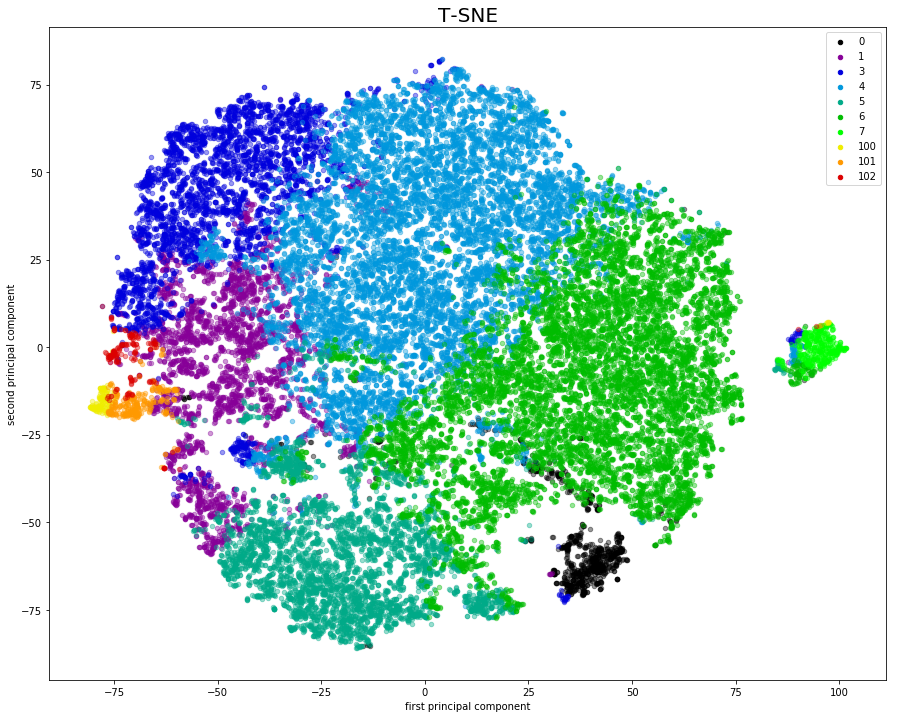

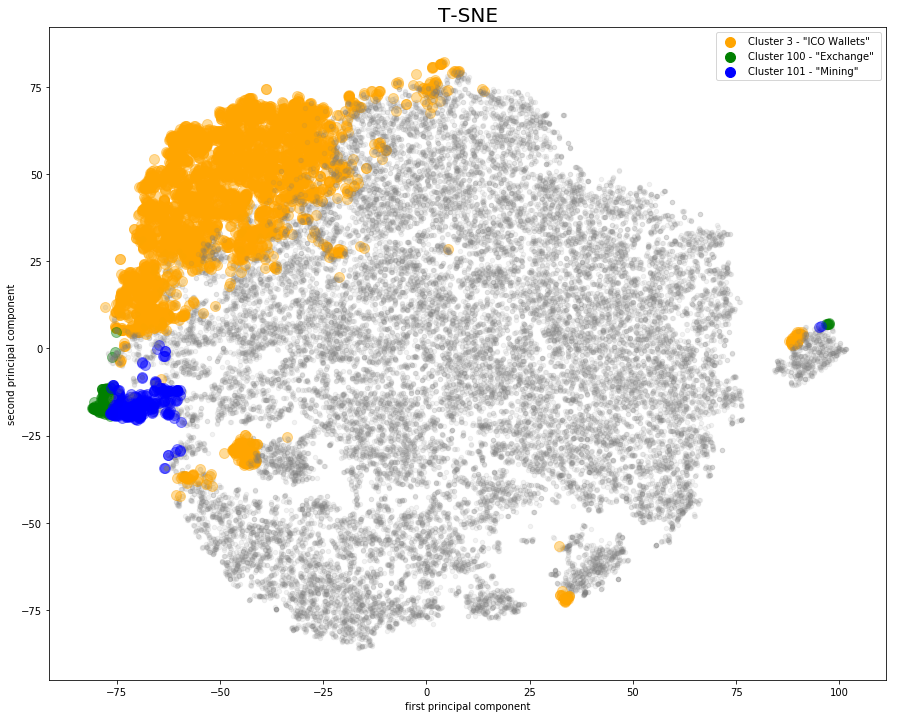

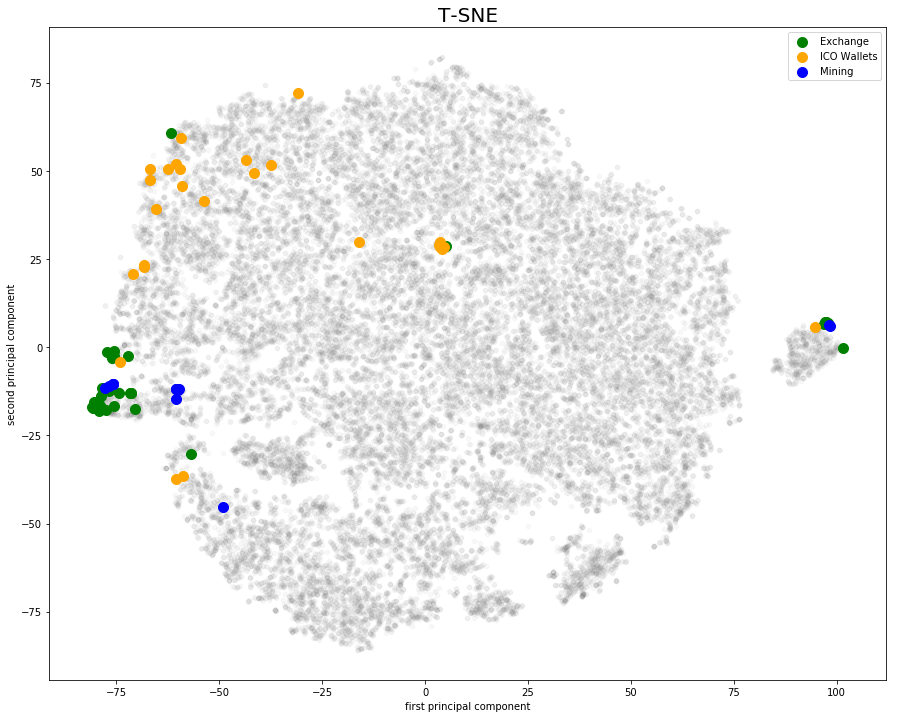

In [360]:
plot_all(tsne_results,clnew,df,dflabel,clusters,categs,colors )

In [361]:
#original cluster
pca = pipe.named_steps['PCA']
scale =pipe.named_steps['scale']
log = pipe.named_steps['log']
c = cl.cluster_centers_
#transform back to real numbers
centroids = log.inverse_transform(scale.inverse_transform(pca.inverse_transform(c)))
maindf_summary = pd.DataFrame(centroids, columns = df.columns[1:], index=np.unique(cl.labels_))

In [362]:
#subcluster
pca = subpipe.named_steps['PCA']
scale =subpipe.named_steps['scale']
log = subpipe.named_steps['log']
c = subcl.cluster_centers_
#transform back to real numbers
centroids = log.inverse_transform(scale.inverse_transform(pca.inverse_transform(c)))
subdf_summary = pd.DataFrame(centroids, columns = df.columns[1:], index=np.unique(subcl.labels_)+100)

In [363]:
dfsummary = pd.concat((maindf_summary[mask], subdf_summary), axis=0)

In [364]:
dfsummary

outgoing_txns  incoming_txns  total_eth_sent  avg_eth_sent  \
0         5.087733       8.842545       22.935497      6.389589   
1        51.600705      89.592694     1088.277830     22.683255   
3        15.997603      18.002698     3927.974700    253.698710   
4        10.393283      11.664529      270.510778     27.220618   
5        11.022481     164.681659       51.073284      5.414399   
6         7.073894       9.831409       23.255366      3.835775   
7        64.533564      42.862527      677.284901     13.661454   
100   47421.886129   15303.559647   466289.159960     10.749649   
101    3431.940152     966.970010     9373.564121      3.592122   
102     358.484301    1897.352574    59789.855695    169.199613   

     total_usd_sent   avg_usd_sent  total_eth_recd  avg_eth_recd  \
0      5.702858e+03    1288.833874      190.264186     23.543834   
1      4.567225e+05    9006.771033     1318.223318     15.914663   
3      1.624139e+06  104594.166795     5969.649221    344.251311   
4      1.174042e+05   11610.656482      488.488700     43.487529   
5      2.127130e+04    1996.625682      143.459824      1.268474   
6      8.736515e+03    1288.340742      105.528858     11.441945   
7      1.812594e+05    2953.025360      641.457782     18.186438   
100    1.789520e+08    3775.073507   415512.931252     30.503648   
101    3.036421e+06     892.049734     8034.395537     10.038870   
102    2.651234e+07   74298.108365    66320.981401     37.434199   

     total_usd_recd   avg_usd_recd     ...       monthly_eth_recd  \
0      5.683028e+04    6676.159765     ...              15.322656   
1      5.452825e+05    6177.397685     ...             132.804677   
3      1.850896e+06  106388.861864     ...             455.292625   
4      1.427194e+05   12555.089423     ...              33.139680   
5      5.007640e+04     310.506826     ...              10.956925   
6      3.066219e+04    3199.489001     ...               7.463463   
7      1.407813e+05    3453.473875     ...              44.394591   
100    1.536862e+08   10052.832155     ...           32328.061456   
101    2.641065e+06    2753.890799     ...             963.167589   
102    2.941622e+07   15541.324182     ...            5994.220340   

     monthly_usd_recd  contracts_created  contract_txns_sent  \
0        4.392961e+03           0.005917            0.017536   
1        5.466213e+04           0.001769            0.004948   
3        1.408909e+05           0.007149            0.022023   
4        9.593741e+03           0.004532            0.011816   
5        3.724772e+03           0.006396            0.012476   
6        2.103847e+03           0.008418            0.020346   
7        8.799642e+03           5.284328          163.881650   
100      1.195675e+07           0.030282            0.386432   
101      3.150631e+05           0.004526            0.028276   
102      2.658352e+06           0.016187            0.035242   

     incoming_avg_time_btwn_txns  incoming_std_time_btwn_txns  \
0                   3.449621e+05                 5.010912e+05   
1                   1.676059e+05                 3.276882e+05   
3                   6.617401e+05                 1.177156e+06   
4                   1.357284e+06                 2.126856e+06   
5                   9.175901e+04                 8.409094e+04   
6                   1.592418e+06                 2.299231e+06   
7                   6.024290e+05                 1.230909e+06   
100                 1.845196e+03                 1.741381e+04   
101                 1.624177e+04                 6.018272e+04   
102                 1.107446e+04                 6.810952e+04   

     outgoing_avg_time_btwn_txns  outgoing_std_time_btwn_txns  \
0                   2.694610e+03                 2.048144e+03   
1                   3.195242e+05                 5.980847e+05   
3                   1.071403e+06                 1.713942e+06   
4                   1.699926e+06                 2.480428e+06   
5           

## Pickle results

In [365]:
import pickle
pickle.dump(clnew, open( "pickles/cl.p", "wb" ) )
pickle.dump(clusters, open( "pickles/clusters.p", "wb" ) )
pickle.dump(categs, open( "pickles/categs.p", "wb" ) )
pickle.dump(colors, open( "pickles/colors.p", "wb" ) )
pickle.dump(df, open( "pickles/df.p", "wb" ) )
pickle.dump(dflabel, open( "pickles/dflabel.p", "wb" ) )
pickle.dump(dfsummary, open( "pickles/dfsummary.p", "wb" ) )

# pickle.dump(labeled_addresses, open( "pickles/labeled_addresses.p", "wb" ) )
# pickle.dump(cats, open( "pickles/cats.p", "wb" ) )
# pickle.dump(not_subset, open( "pickles/not_subset.p", "wb" ) )
# pickle.dump(labelmask, open( "pickles/labelmask.p", "wb" ) )

In [372]:
dfsummary.to_csv('dfsummary.csv')